In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

#The sequential model is a linear stack of layers

#For inputs that are 'batch' shaped without a channel dimmension, flattening adds an extra channel dimension

#The batch size denotes the subset of the training sample, so the batch input shape defines that the sequential model
#can only accept input data of the defined batch size.

#For a dense layer, every input is connected to every output by a weight.

#For a convolutional layer, a linear operation uses a subset of the weights of a dense layer.
#Nearby inputs are connected to nearby outputs.

#Dropout is designed to prevent overfitting. Randomly sets a fraction rate of inputs to '0' at each update during 
#training. Overfitting is when the neural network is so closely fitted to the training set that it becomes difficult
#to generalize and make predictions. 

#Relu function as mentioned earlier "rectified linear unit"
#softmax uses an input tensor "X" and outputs a tensor where softmax normalization is applied

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Conventionally, target outputs from a neuron are converted to an encoded array to match the input shape.
#SCC skips this step and keeps integers as targets.

#One epoch is when an entire data set is passed forward and backward the entire neural network.
#To make processing easier for the computer, the epoch number subdivides it into smaller batches.
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

mnist.sumary()

Epoch 1/5
60000/60000 [==============================] - 15s 252us/step - loss: 0.2191 - acc: 0.9358

In [50]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [51]:
#Mnist is one of several training data sets that comes with tensorflow

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [52]:
#Class names are created by the users and will later attached to index values of the
#tain_labels data. 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [53]:
#The shape of the neural network consists of 60000, 28X28 images of clothing.
train_images.shape

(60000, 28, 28)

In [54]:
#The labels are the actual classification of the article of clothing.
len(train_labels)


60000

In [55]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [56]:
test_images.shape


(10000, 28, 28)

In [57]:
len(test_labels)

10000

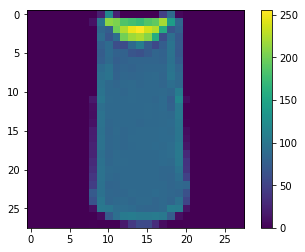

In [58]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

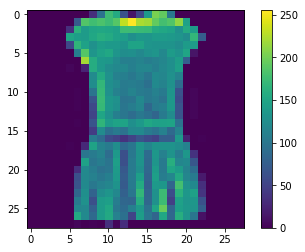

In [59]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [60]:
train_images = train_images / 255.0

test_images = test_images / 255.0

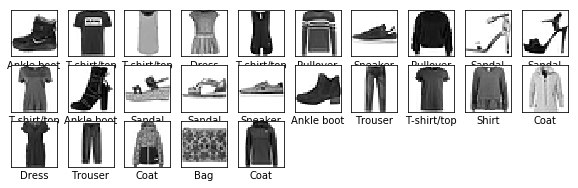

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
#model = keras.Sequential([
 #   keras.layers.Flatten(input_shape=(28, 28)),
  #  keras.layers.Dense(128, activation=tf.nn.relu),
   # keras.layers.Dense(10, activation=tf.nn.softmax)
#])

In [64]:
#The model fit command trains the model for the given number of epochs
model.fit(train_images, train_labels, batch_size=len(x_train), epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 2s 29us/step - loss: 1.7484 - acc: 0.5377
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 1.5326 - acc: 0.5781
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 1.3244 - acc: 0.6093
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 1.1670 - acc: 0.6378
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 1.0820 - acc: 0.6434


In [65]:
#The model evaluate command returns the loss value and metrics values for the model in test mode.
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 36us/step - ETA: 0s
Test accuracy: 0.6675
